Next steps:
- [x] Add legend
- [ ] Adjust positioning of the graph nodes. I.e., internal inputs (blue) at the top and key outputs (green) at the bottom
- [ ] [Code cleaning and robusting]...
- [ ] Jacques review
- [ ] [Some more code cleaning and robusting]...
- [ ] Add unit tests

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from pathlib import Path
from core.trbs import TheResponsibleBusinessSimulator
import math 
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import random

In [66]:
def determine_category(node):
    if node in input_dict["key_outputs"]:
        return "key_output"
    elif node in input_dict["internal_variable_inputs"]:
        return "internal_input"
    elif node in input_dict["external_variable_inputs"]:
        return "external_input"
    elif node in input_dict["fixed_inputs"]:
        return "fixed_input"
    else:
        return "intermediate"

def category_color(node):
    category_is = determine_category(node)
    if category_is == 'fixed_input':
        return 'yellow'
    elif category_is == 'external_input':
        return 'orange'
    elif category_is == 'internal_input':
        return 'turquoise'
    elif category_is == 'key_output':
        return 'green'
    else:
        # intermediaries and other unaccounted categories
        return 'grey'
    
def category_shape(node):
    category_is = determine_category(node)
    if category_is == 'fixed_input':
        return 'o'
    elif category_is == 'external_input':
        return 'o'
    elif category_is == 'internal_input':
        return 'o'
    elif category_is == 'key_output':
        return '*'
    else:
        # intermediaries and other unaccounted categories
        return 'D'

## Toy Example:
### Farmer has TWO choices:

1. Invest in Apples
2. Invest in Machinery

In [3]:
# Read the CSV file
data = pd.read_csv('data/toy/csv/dependencies.csv')

path = Path.cwd() / 'data'
file_format = 'xlsx'
name = 'toy'

case = TheResponsibleBusinessSimulator(path, file_format, name)
case.build()
data = pd.DataFrame({
    'argument_1': case.input_dict['argument_1'], 
    'operator': case.input_dict['operator'], 
    'argument_2': case.input_dict['argument_2'], 
    'destination': case.input_dict['destination']
})
data

Creating 'toy'
Hierarchy calculated in 2 iterations


,argument_1,operator,argument_2,destination
0,investment in apples,*,% ROI apples,profit
1,investment in machinery,*,% ROI machinery,profit
2,investment in machinery,/,cost of machines,number of machines
3,number of machines,*,efficiency per machine,efficiency


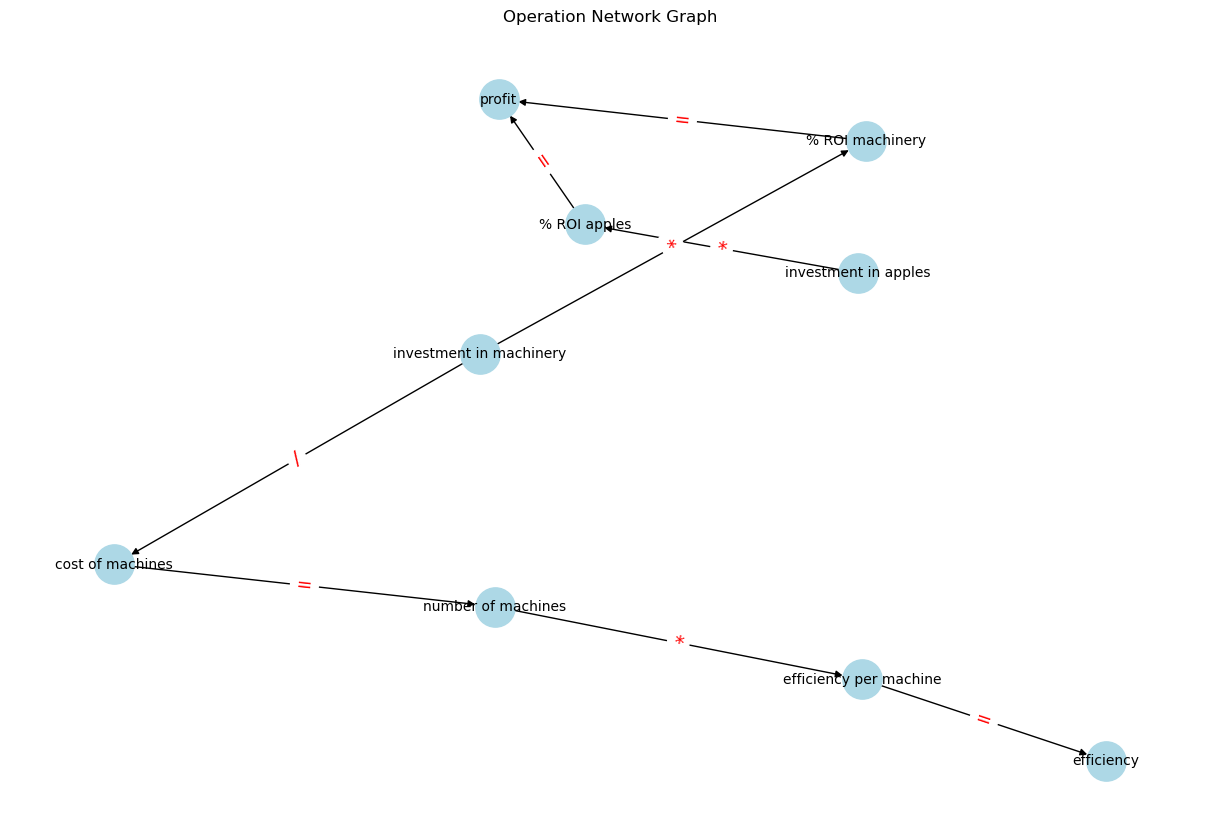

In [4]:
# Initialize a directed graph
G = nx.DiGraph()

# Iterate through the rows of the DataFrame to add nodes and edges
for index, row in data.iterrows():
    destination = row['destination']
    argument_1 = row['argument_1']
    argument_2 = row['argument_2']
    operator = row['operator']
    
    # Add nodes for destination, argument_1, and argument_2
    G.add_node(destination)
    G.add_node(argument_1)
    G.add_node(argument_2)
    
    # Add an edge from argument_1 to destination with the operator as the label
    if pd.isna(argument_1):
        G.add_edge(argument_2, destination, operator='squeezed')
    elif pd.isna(argument_2):
        G.add_edge(argument_1, destination, operator='squeezed')
    else:
        G.add_edge(argument_1, argument_2, operator=operator)
        # Later make function so that based on category, we make the edge to destination
        G.add_edge(argument_2, destination, operator='=')

# Define the layout for the graph (you can use different layouts)
pos = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=800, node_color='lightblue', font_size=10, font_color='black')
edge_labels = nx.get_edge_attributes(G, 'operator')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=14, font_color='red')
plt.title('Operation Network Graph')
plt.show()

In [5]:
# Initialize a directed graph
G = nx.DiGraph()

input_dict = case.input_dict

# Iterate through the rows of the DataFrame to add nodes and edges
for index, row in data.iterrows():
    destination = row['destination']
    argument_1 = row['argument_1']
    argument_2 = row['argument_2']
    operator = row['operator']
    
    # Add nodes for destination, argument_1, and argument_2
    G.add_node(destination, color = category_color(destination))
    G.add_node(argument_1, color = category_color(argument_1))
    G.add_node(argument_2, color = category_color(argument_2))
    
    # Add an edge from argument_1 to destination with the operator as the label
    if pd.isna(argument_1):
        G.add_edge(argument_2, destination, label='squeezed', color='black')
    elif pd.isna(argument_2):
        G.add_edge(argument_1, destination, label='squeezed', color='black')
    else:
        G.add_edge(argument_1, argument_2, label=operator, color='black')
        # Later make function so that based on category, we make the edge to destination
        G.add_edge(argument_2, destination, label='=', color='black')

In [6]:
# Define the layout for the graph (you can use different layouts)
pos = nx.spectral_layout(G)

net = Network(notebook=True, cdn_resources='remote')
net.from_nx(G)
net.show_buttons()
net.show("example.html")

example.html


## Nyenrode Exercise case

In [7]:
# Read the CSV file
data = pd.read_csv('data/toy/csv/dependencies.csv')

path = Path.cwd() / 'data'
file_format = 'xlsx'
name = 'FinalTemplate'

case = TheResponsibleBusinessSimulator(path, file_format, name)
case.build()

data = pd.DataFrame({
    'argument_1': case.input_dict['argument_1'], 
    'operator': case.input_dict['operator'], 
    'argument_2': case.input_dict['argument_2'], 
    'destination': case.input_dict['destination']
})

Creating 'FinalTemplate'
Hierarchy calculated in 4 iterations


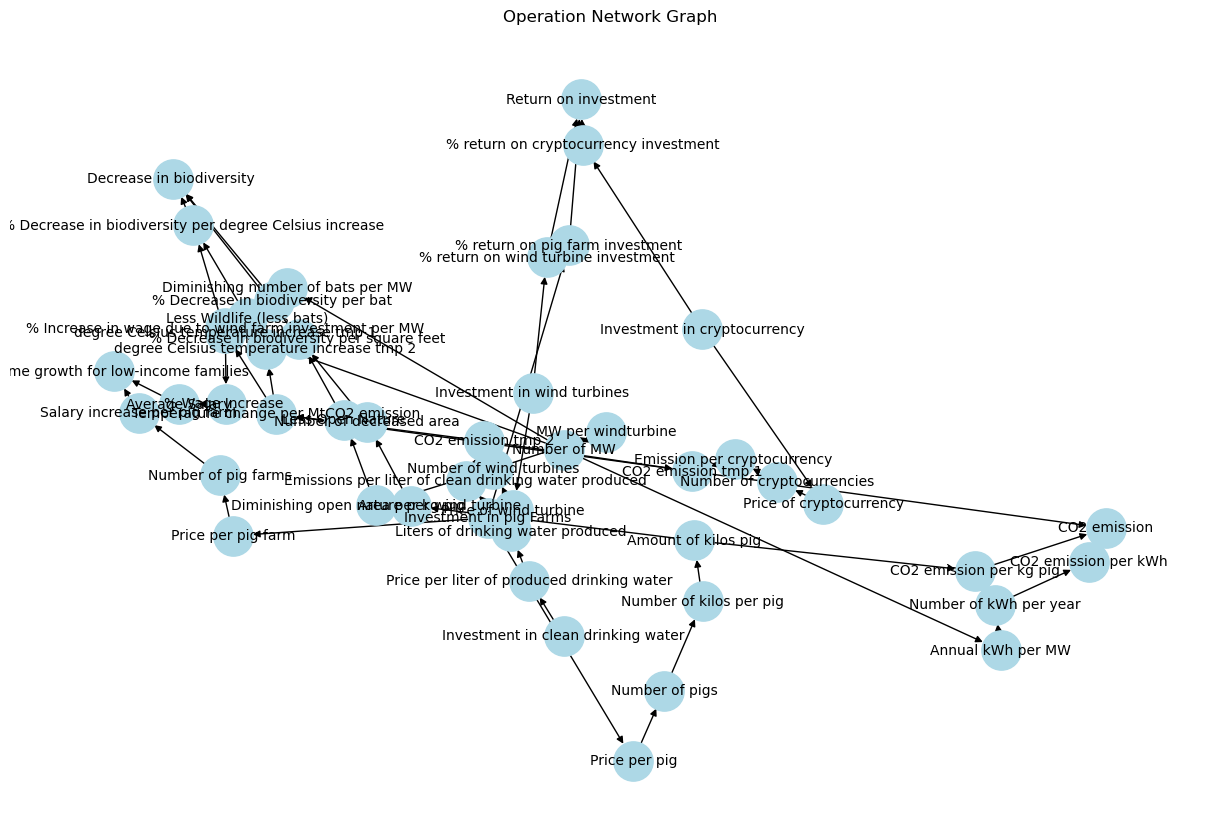

In [8]:
# Initialize a directed graph
G = nx.DiGraph()

input_dict = case.input_dict

# Iterate through the rows of the DataFrame to add nodes and edges
for index, row in data.iterrows():
    destination = row['destination']
    argument_1 = row['argument_1']
    argument_2 = row['argument_2']
    operator = row['operator']
    
    # Add nodes for destination, argument_1, and argument_2
    G.add_node(destination, color = category_color(destination))
    
    # Add an edge from argument_1 to destination with the operator as the label
    if pd.isnull(argument_1):
        print(argument_2, category_color(argument_2))
        G.add_node(argument_2, color = category_color(argument_2))
        G.add_edge(argument_2, destination, label=operator, color='black')
    elif pd.isnull(argument_2):
        print(argument_1, category_color(argument_1))
        G.add_node(argument_1, color = category_color(argument_1))
        G.add_edge(argument_1, destination, label=operator, color='black')
    else:
        G.add_node(argument_1, color = category_color(argument_1))
        G.add_node(argument_2, color = category_color(argument_2))
        G.add_edge(argument_1, argument_2, label=operator, color='black')
        # Later make function so that based on category, we make the edge to destination
        G.add_edge(argument_2, destination, label='=', color='black')
        
# Define the layout for the graph (you can use different layouts)
pos = nx.spring_layout(G, seed=42)

# Draw the graph (STATIC)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=800, node_color='lightblue', font_size=10, font_color='black')
edge_labels = nx.get_edge_attributes(G, 'operator')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=14, font_color='red')
plt.title('Operation Network Graph')
plt.show()

## For the beerwiser case

In [9]:
# Read the CSV file
data = pd.read_csv('data/toy/csv/dependencies.csv')

path = Path.cwd() / 'data'
file_format = 'xlsx'
name = 'beerwiser'

case = TheResponsibleBusinessSimulator(path, file_format, name)
case.build()

data = pd.DataFrame({
    'argument_1': case.input_dict['argument_1'], 
    'operator': case.input_dict['operator'], 
    'argument_2': case.input_dict['argument_2'], 
    'destination': case.input_dict['destination']
})

data

Creating 'beerwiser'
Hierarchy calculated in 5 iterations


,argument_1,operator,argument_2,destination
0,Invest in training of employees,squeezed *,NaN,Accidents reduction %
1,Invest in water recycling,squeezed *,NaN,Water use reduction % when effective
2,Invest in training of employees,/,# employees,Cost of training per employee
3,Water use reduction % when effective,*,Effectiveness water recycling,Water use reduction %
4,Current # accidents,*,Accidents reduction %,Accidents reduction
5,Water use reduction %,*,Current water use,Water use reduction
6,Accidents reduction,*,Cost of accident,Production cost reduction $
7,Current # accidents,-,Accidents reduction,New # accidents
8,Water use reduction,*,Water unit cost,Production cost reduction $
9,Current water use,-,Water use reduction,New water use


In [10]:
# Initialize a directed graph
G = nx.DiGraph()

input_dict = case.input_dict

# Iterate through the rows of the DataFrame to add nodes and edges
for index, row in data.iterrows():
    destination = row['destination']
    argument_1 = row['argument_1']
    argument_2 = row['argument_2']
    operator = row['operator']
    
    # Add nodes for destination, argument_1, and argument_2
    G.add_node(destination, color = category_color(destination))
    
    # Add an edge from argument_1 to destination with the operator as the label
    if pd.isnull(argument_1):
        print(argument_2, category_color(argument_2))
        G.add_node(argument_2, color = category_color(argument_2))
        G.add_edge(argument_2, destination, label=operator, color='black')
    elif pd.isnull(argument_2):
        print(argument_1, category_color(argument_1))
        G.add_node(argument_1, color = category_color(argument_1))
        G.add_edge(argument_1, destination, label=operator, color='black')
    else:
        G.add_node(argument_1, color = category_color(argument_1))
        G.add_node(argument_2, color = category_color(argument_2))
        G.add_edge(argument_1, argument_2, label=operator, color='black')
        # Later make function so that based on category, we make the edge to destination
        G.add_edge(argument_2, destination, label='=', color='black')

Invest in training of employees blue
Invest in water recycling blue


In [11]:
# Define the layout for the graph (you can use different layouts)
pos = nx.spring_layout(G, seed=42)

net = Network(notebook=True, cdn_resources='remote')
net.from_nx(G)
net.show_buttons()
net.show("example.html")

example.html


## Hierarchy

In [4]:
# Read the data and build the case
path = Path.cwd() / 'data'
file_format = 'xlsx'
name = 'FinalTemplate'
case = TheResponsibleBusinessSimulator(path, file_format, name)
case.build()

# Create a new dict with only the data fields necessary for the dependency tree
your_keys = ['argument_1', 'argument_2', 'destination', 'operator', 'hierarchy', 'dependencies_order']
new_dict = {key: case.input_dict[key] for key in your_keys}
data = pd.DataFrame.from_dict(new_dict)

Creating 'FinalTemplate'
Hierarchy calculated in 4 iterations


In [ ]:
def create_legend(legend_dict):
    handles = []
    labels = []
    for category, color in legend_dict.items():
        handles.append(plt.Line2D([0], [0], color=color, marker='o', markersize=10, linewidth=0))
        labels.append(f'{category}')
    return handles, labels

In [67]:
# Initialize a directed graph
G = nx.DiGraph()

# input_dict is used in the determine_category() 
input_dict = case.input_dict

# Iterate through the rows of the DataFrame to add nodes and edges
for index, row in data.iterrows():
    destination = row['destination']
    argument_1 = row['argument_1']
    argument_2 = row['argument_2']
    operator = row['operator']
    row_level = row['hierarchy']
    
    # Determine the category of each node
#     dest_category = determine_category(destination)
#     arg1_category = determine_category(argument_1)
#     arg2_category = determine_category(argument_2)

    # Add nodes for destination, argument_1, and argument_2 
    G.add_node(destination, color=category_color(destination), shape=category_shape(destination))
    G.add_node(argument_1, color=category_color(argument_1), shape=category_shape(argument_1))
    G.add_node(argument_2, color=category_color(argument_2), shape=category_shape(argument_2))
    
    # Add edges from argument nodes to the destination node with levels
    if pd.isna(argument_1):
        G.add_edge(argument_2, destination, label='squeezed', color='black')
    elif pd.isna(argument_2):
        G.add_edge(argument_1, destination, label='squeezed', color='black')
    else:
        G.add_edge(argument_1, destination, label=operator, color='black')
        G.add_edge(argument_2, destination, label=operator, color='black')

In [72]:
G.nodes(data=True)

NodeDataView({'Return on investment': {'color': 'green', 'shape': '*'}, 'Investment in wind turbines': {'color': 'turquoise', 'shape': 'o'}, '% return on wind turbine investment': {'color': 'orange', 'shape': 'o'}, 'Investment in cryptocurrency': {'color': 'turquoise', 'shape': 'o'}, '% return on cryptocurrency investment': {'color': 'orange', 'shape': 'o'}, 'Investment in pig Farms': {'color': 'turquoise', 'shape': 'o'}, '% return on pig farm investment': {'color': 'orange', 'shape': 'o'}, 'Liters of drinking water produced': {'color': 'grey', 'shape': 'D'}, 'Investment in clean drinking water': {'color': 'turquoise', 'shape': 'o'}, 'Price per liter of produced drinking water': {'color': 'yellow', 'shape': 'o'}, 'Number of pig farms': {'color': 'grey', 'shape': 'D'}, 'Price per pig farm': {'color': 'yellow', 'shape': 'o'}, 'Number of cryptocurrencies': {'color': 'grey', 'shape': 'D'}, 'Price of cryptocurrency': {'color': 'yellow', 'shape': 'o'}, 'Number of pigs': {'color': 'grey', 'sh

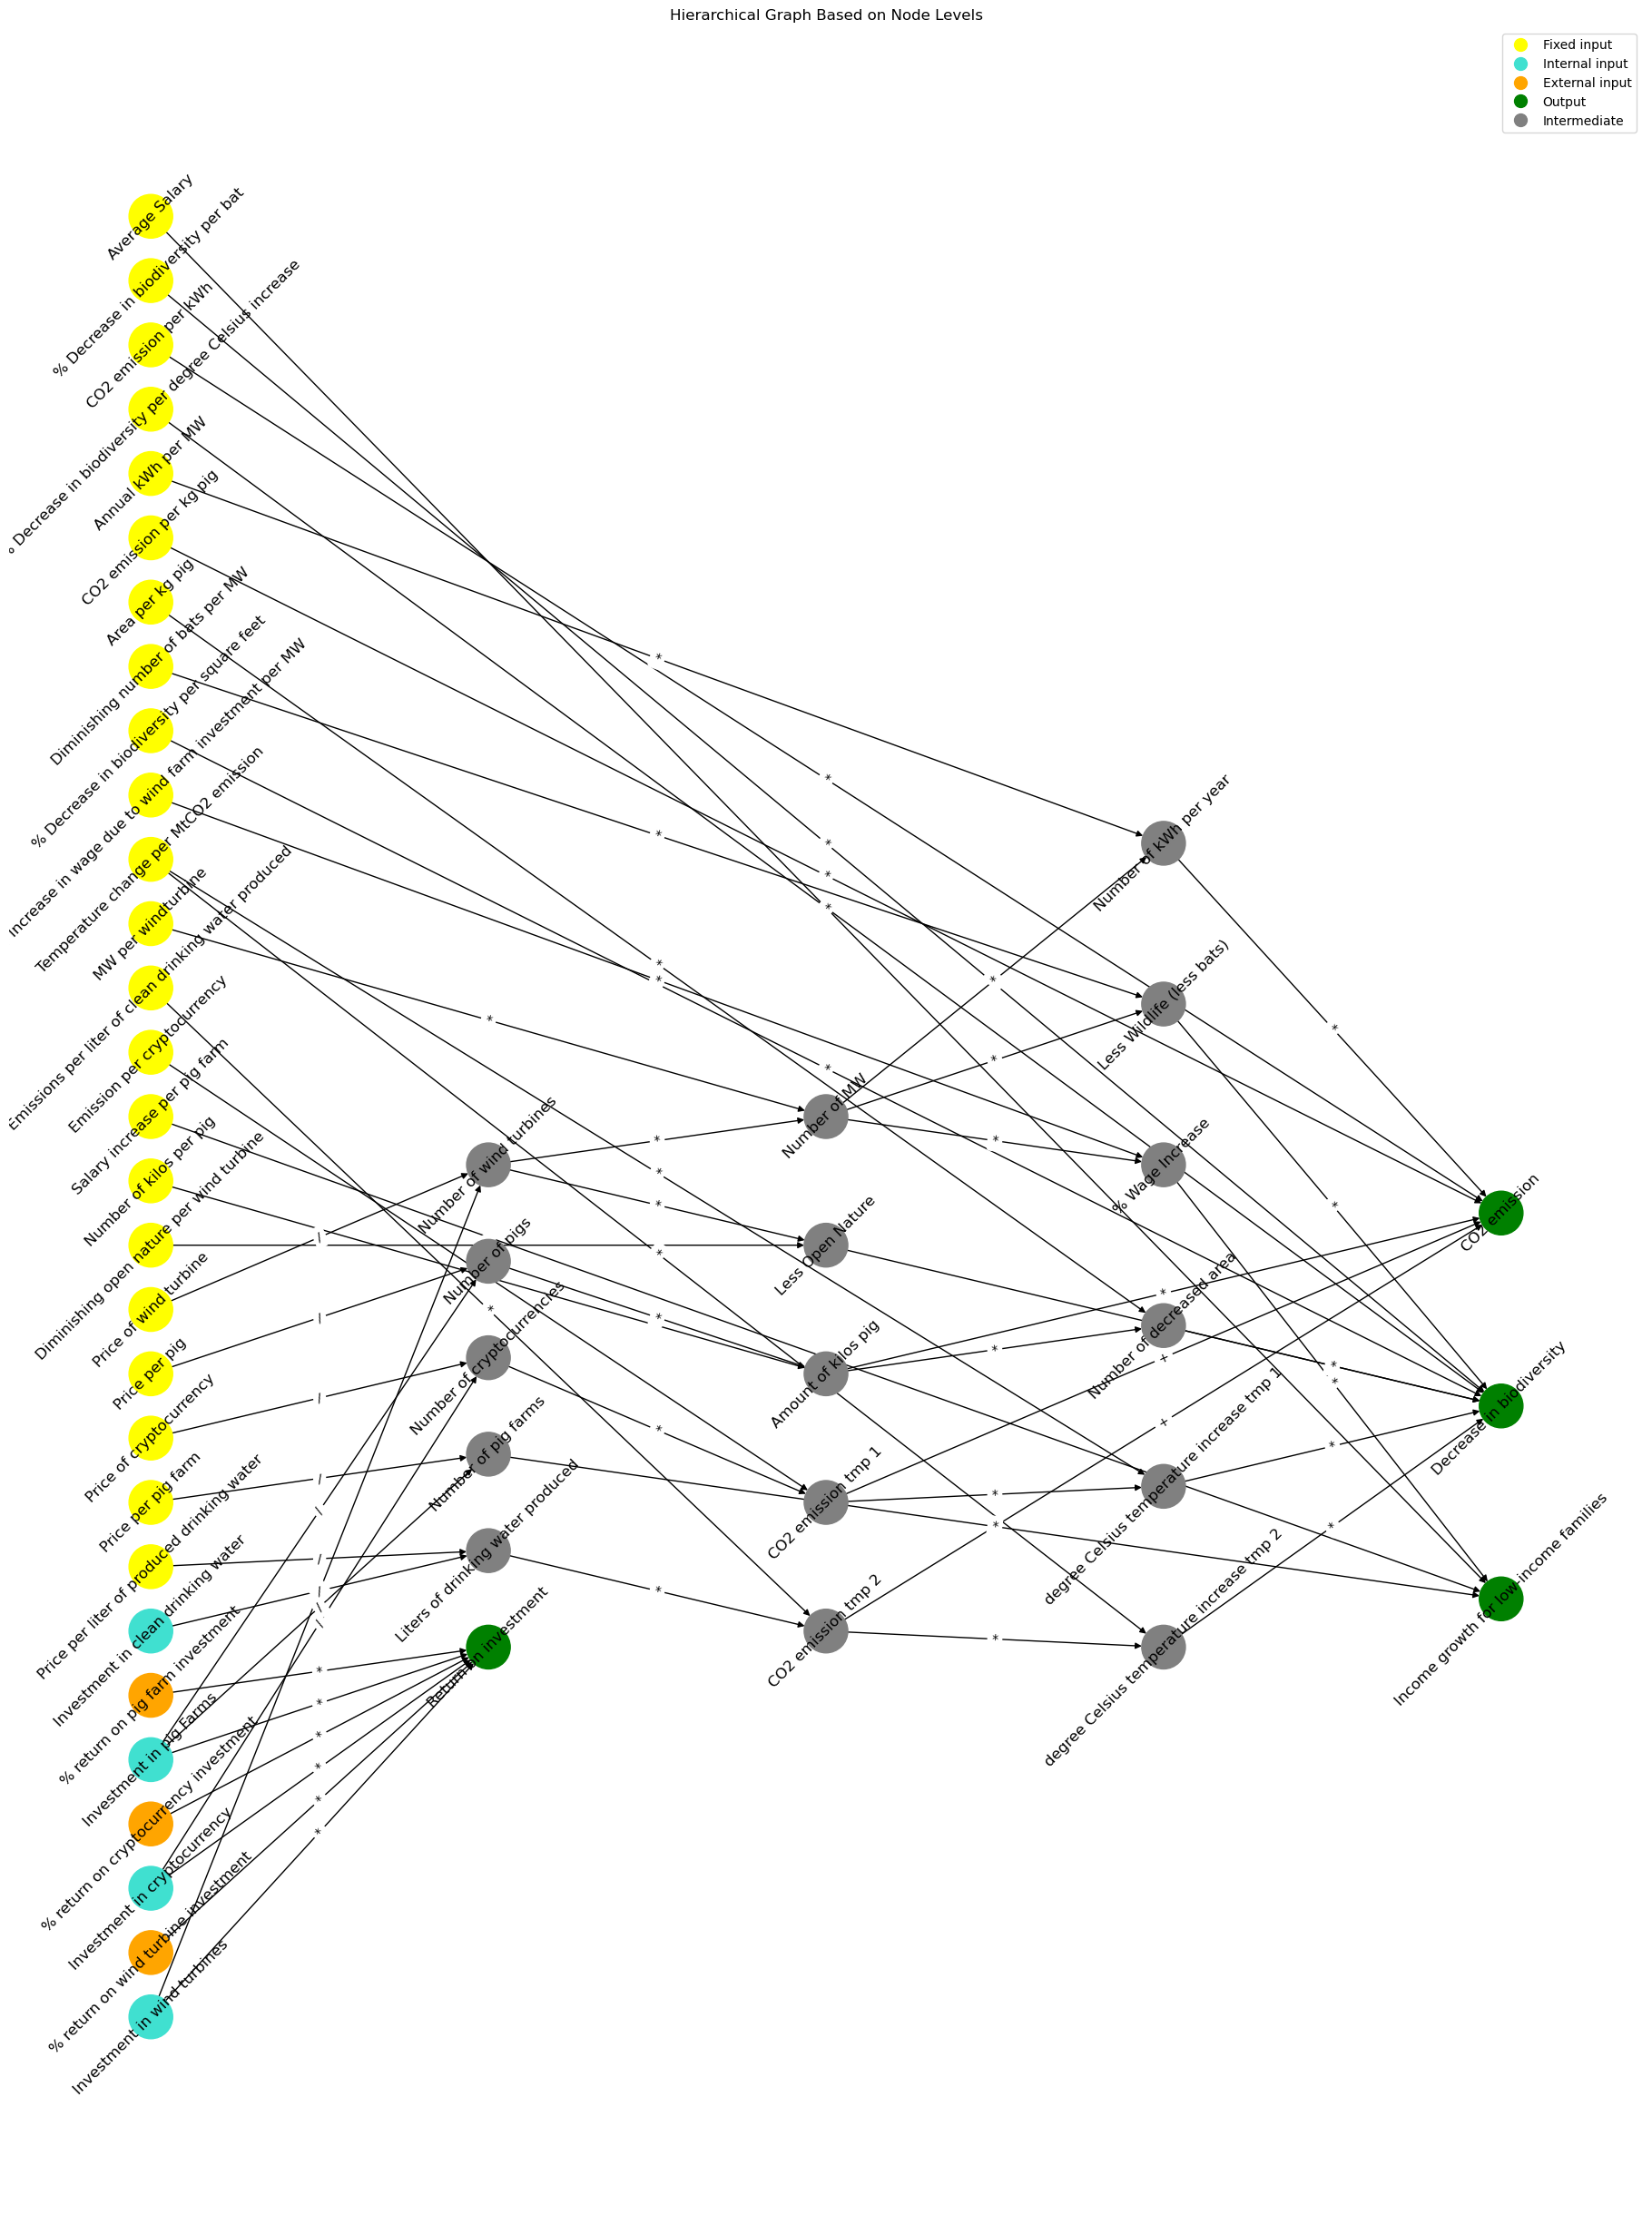

In [7]:
# Create a dictionary to store nodes at each level
nodes_by_level = defaultdict(list)
for i, node_list in enumerate(nx.topological_generations(G)):
    for node in node_list:
        level = i
        nodes_by_level[level].append(node)
    
# Create positions for nodes in the hierarchical layout
pos = {}

# TOP DOWN
# x_spacing = 10  # Adjust this value for spacing between nodes at the same level
# y_spacing = 5.0  # Adjust this value for vertical spacing between levels
# for level, nodes in nodes_by_level.items():
#     num_nodes = len(nodes)
#     x_values = [(i - (num_nodes - 1) / 2) * x_spacing for i in range(num_nodes)]
#     y_value = -level * y_spacing  
#     pos.update((node, (x, y_value)) for node, x in zip(nodes, x_values))

# LEFT TO RIGHT
x_spacing = 1.0  # Adjust this value for spacing between levels
y_spacing = 5.0  # Adjust this value for vertical spacing between nodes at the same level
for level, nodes in nodes_by_level.items():
    num_nodes = len(nodes)
    x_value = level * x_spacing
    y_values = [(i*(level + 2) - (num_nodes - 1) / 2) * y_spacing for i in range(num_nodes)]
    pos.update((node, (x_value, y_value)) for node, y_value in zip(nodes, y_values))

# Plot the graph
edge_labels = {(u, v): d["label"] for u, v, d in G.edges(data=True)}
node_colors = [G.nodes[node]["color"] for node in G.nodes()]
legend_dict = {
    'Fixed input': 'yellow', 
    'Internal input': 'turquoise', 
    'External input': 'orange', 
    'Output': 'green', 
    'Intermediate': 'grey'
}

plt.figure(figsize=(18, 24))

# with_labels=False because of rotating the node labels
nx.draw(G, pos, node_color=node_colors, with_labels=False, node_size=1200, font_size=10)

text = nx.draw_networkx_labels(G, pos)

# Rotate the node labels 
for _, t in text.items():
    t.set_rotation(45) 
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Create and add legend
legend_handles, legend_labels = create_legend(legend_dict)

plt.title("Hierarchical Graph Based on Node Levels")
plt.legend(legend_handles, legend_labels, loc='upper right')
plt.axis('off')  # Turn off axis for cleaner display
plt.show()

### Assigning colors and subsetting based on leaf node

In [22]:
number_of_colors = len(data)

COLOR_LIST = ['#000000', '#AD1B02', '#D85604', '#E88D14', '#F3BE26', '#E669A2']
# color = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
#              for i in range(number_of_colors)]

color = random.choices(COLOR_LIST, k=number_of_colors)
data['dep_color'] = color

In [33]:
# Function to draw the graph
def draw_subset_graph(nodes):
    ## Classifying argument1, argument2, destination
    ## Robusting TODO: Make subset graph using parent graph but without re-creating a new graph
    print(nodes)
    tuples = []
    for index, row in data.iterrows():
        destination = row['destination']
        argument_1 = row['argument_1']
        argument_2 = row['argument_2']
        operator = row['operator']
        row_level = row['hierarchy']
        edge_color = row['dep_color']
        
        # tuple = (argument_1, NULL, NULL, NULL)
        
        print("Arg1: ", argument_1, "| Arg2: ", argument_2, "| Destination: ", destination)
        
#         nodes_clone = nodes.copy()
        if (argument_1 in nodes) and (argument_2 in nodes) and (destination in nodes):
            t = (argument_1, argument_2, destination, operator, edge_color)
            tuples.append(t)
            # POTENTIAL BUG: What if a node is used in multiple rows?
            ## FIX: Remove/comment the lines below?
#             nodes_clone.remove(argument_1)
#             nodes_clone.remove(argument_2)
#             nodes_clone.remove(destination)
#     print(tuples)
    
    # Make the graph and add the nodes
    G = nx.DiGraph()
    for t in tuples:
        G.add_node(t[0], color=category_color(t[0]))
        G.add_node(t[1], color=category_color(t[1]))
        G.add_node(t[2], color=category_color(t[2]))
        
        # Add edges from argument nodes to the destination node with levels
        if pd.isna(t[0]):
            G.add_edge(t[1], t[2], label='squeezed', color='black')
        elif pd.isna(t[1]):
            G.add_edge(t[0], t[2], label='squeezed', color='black')
        else:
            G.add_edge(t[0], t[2], label=t[3], color=t[4], weight=3)
            G.add_edge(t[1], t[2], label=t[3], color=t[4], weight=3)
    
    # Create a dictionary to store nodes at each level
    nodes_by_level = defaultdict(list)
    for i, node_list in enumerate(nx.topological_generations(G)):
        for node in node_list:
            level = i
            nodes_by_level[level].append(node)
    
    # Create positions for nodes in the hierarchical layout
    pos = {}

    # LEFT TO RIGHT
    x_spacing = 1.0  # Adjust this value for spacing between levels
    y_spacing = 1.0  # Adjust this value for vertical spacing between nodes at the same level
    for level, nodes in nodes_by_level.items():
        num_nodes = len(nodes)
        x_value = level * x_spacing
        y_values = [(i*(level + 2) - (num_nodes - 1) / 2) * y_spacing for i in range(num_nodes)]
        pos.update((node, (x_value, y_value)) for node, y_value in zip(nodes, y_values))

    # Plot the graph
    edge_labels = {(u, v): d["label"] for u, v, d in G.edges(data=True)}
    edge_colors = [G[u][v]['color'] for u, v in G.edges()]
    edge_weights = [G[u][v]['weight'] for u,v in G.edges()]
    node_colors = [G.nodes[node]["color"] for node in G.nodes()]
    
    plt.figure(figsize=(18, 24))

    # with_labels=False because of rotating the node labels
    nx.draw(G, pos, node_color=node_colors, edge_color=edge_colors, width=edge_weights, with_labels=False, node_size=2500)

    text = nx.draw_networkx_labels(G, pos, font_weight='bold')

    # Rotate the node labels 
    for _, t in text.items():
        t.set_rotation(45) 
#     nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.75,
                             font_color='red', font_size=18, font_weight='bold')

    # Create and add legend
    legend_handles, legend_labels = create_legend(legend_dict)

    plt.title("Hierarchical Graph Based on Node Levels")
    plt.legend(legend_handles, legend_labels, loc='upper right')
    plt.axis('off')  # Turn off axis for cleaner display
    plt.show()

In [63]:
from difflib import get_close_matches

def select_subset(G, name_of_node):
    # Match to closest node
    name_of_node = "".join(get_close_matches(word=name_of_node, possibilities=list(G), n=1))
    ## TODO: Assert name_of_node is not empty
    nodes_subset = list(nx.ancestors(G, name_of_node))
    nodes_subset.append(name_of_node)
    nodes_subset += nx.descendants(G, name_of_node)
#     print(nodes_subset)
#     print(nx.ancestors(G, name_of_node))
#     print(nx.descendants(G, name_of_node))
    # nx.draw(ancestors, pos, node_color=node_colors, with_labels=False, node_size=1200, font_size=10)
    draw_subset_graph(nodes_subset)

['Price of wind turbine', 'Investment in wind turbines', 'Number of wind turbines', 'Less Open Nature', 'Income growth for low-income families', 'Number of MW', 'Less Wildlife (less bats)', 'CO2 emission', 'Number of kWh per year', '% Wage Increase ', 'Decrease in biodiversity\xa0']
Arg1:  Investment in wind turbines | Arg2:  % return on wind turbine investment | Destination:  Return on investment
Arg1:  Investment in cryptocurrency | Arg2:  % return on cryptocurrency investment | Destination:  Return on investment
Arg1:  Investment in pig Farms | Arg2:  % return on pig farm investment | Destination:  Return on investment
Arg1:  Investment in clean drinking water | Arg2:  Price per liter of produced drinking water | Destination:  Liters of drinking water produced
Arg1:  Investment in pig Farms | Arg2:  Price per pig farm | Destination:  Number of pig farms
Arg1:  Investment in cryptocurrency | Arg2:  Price of cryptocurrency | Destination:  Number of cryptocurrencies
Arg1:  Investment i

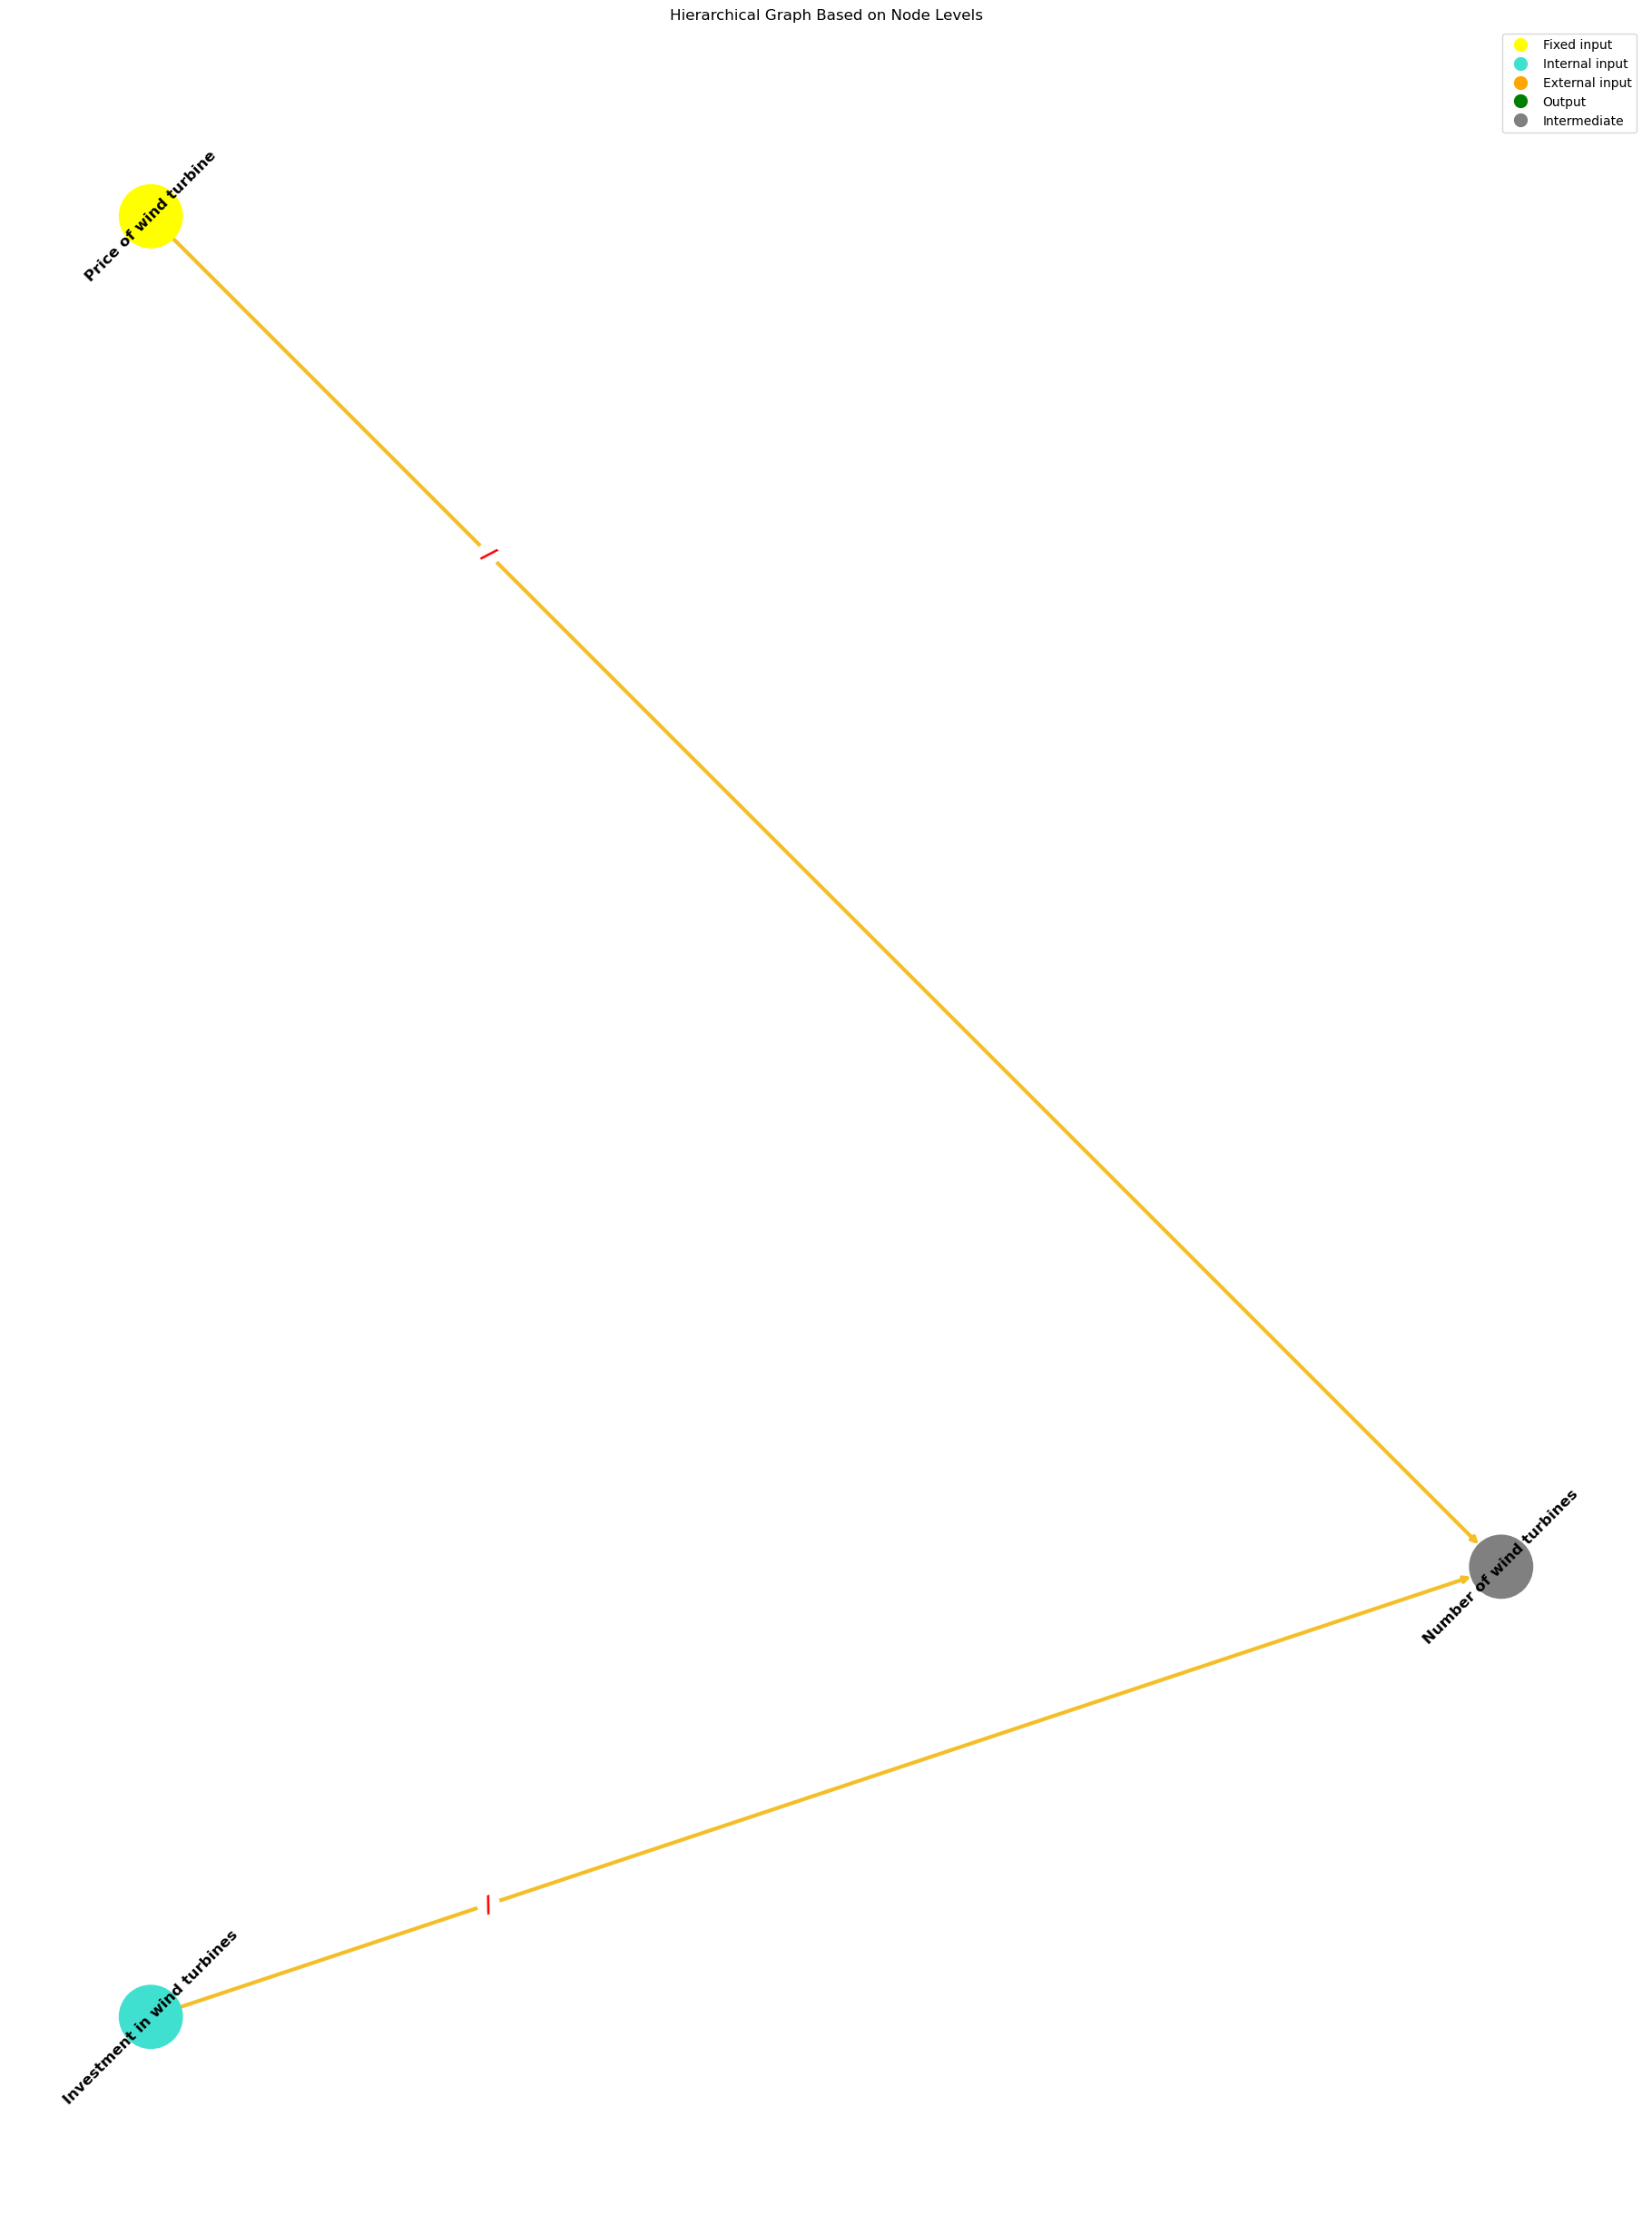

In [64]:
# Test out the subgraph function with a few examples:
select_subset(G, 'Number of wind turbines')

['% return on cryptocurrency investment', '% return on pig farm investment', 'Investment in cryptocurrency', 'Investment in pig Farms', '% return on wind turbine investment', 'Investment in wind turbines', 'Return on investment']
Arg1:  Investment in wind turbines | Arg2:  % return on wind turbine investment | Destination:  Return on investment
Arg1:  Investment in cryptocurrency | Arg2:  % return on cryptocurrency investment | Destination:  Return on investment
Arg1:  Investment in pig Farms | Arg2:  % return on pig farm investment | Destination:  Return on investment
Arg1:  Investment in clean drinking water | Arg2:  Price per liter of produced drinking water | Destination:  Liters of drinking water produced
Arg1:  Investment in pig Farms | Arg2:  Price per pig farm | Destination:  Number of pig farms
Arg1:  Investment in cryptocurrency | Arg2:  Price of cryptocurrency | Destination:  Number of cryptocurrencies
Arg1:  Investment in pig Farms | Arg2:  Price per pig | Destination:  Num

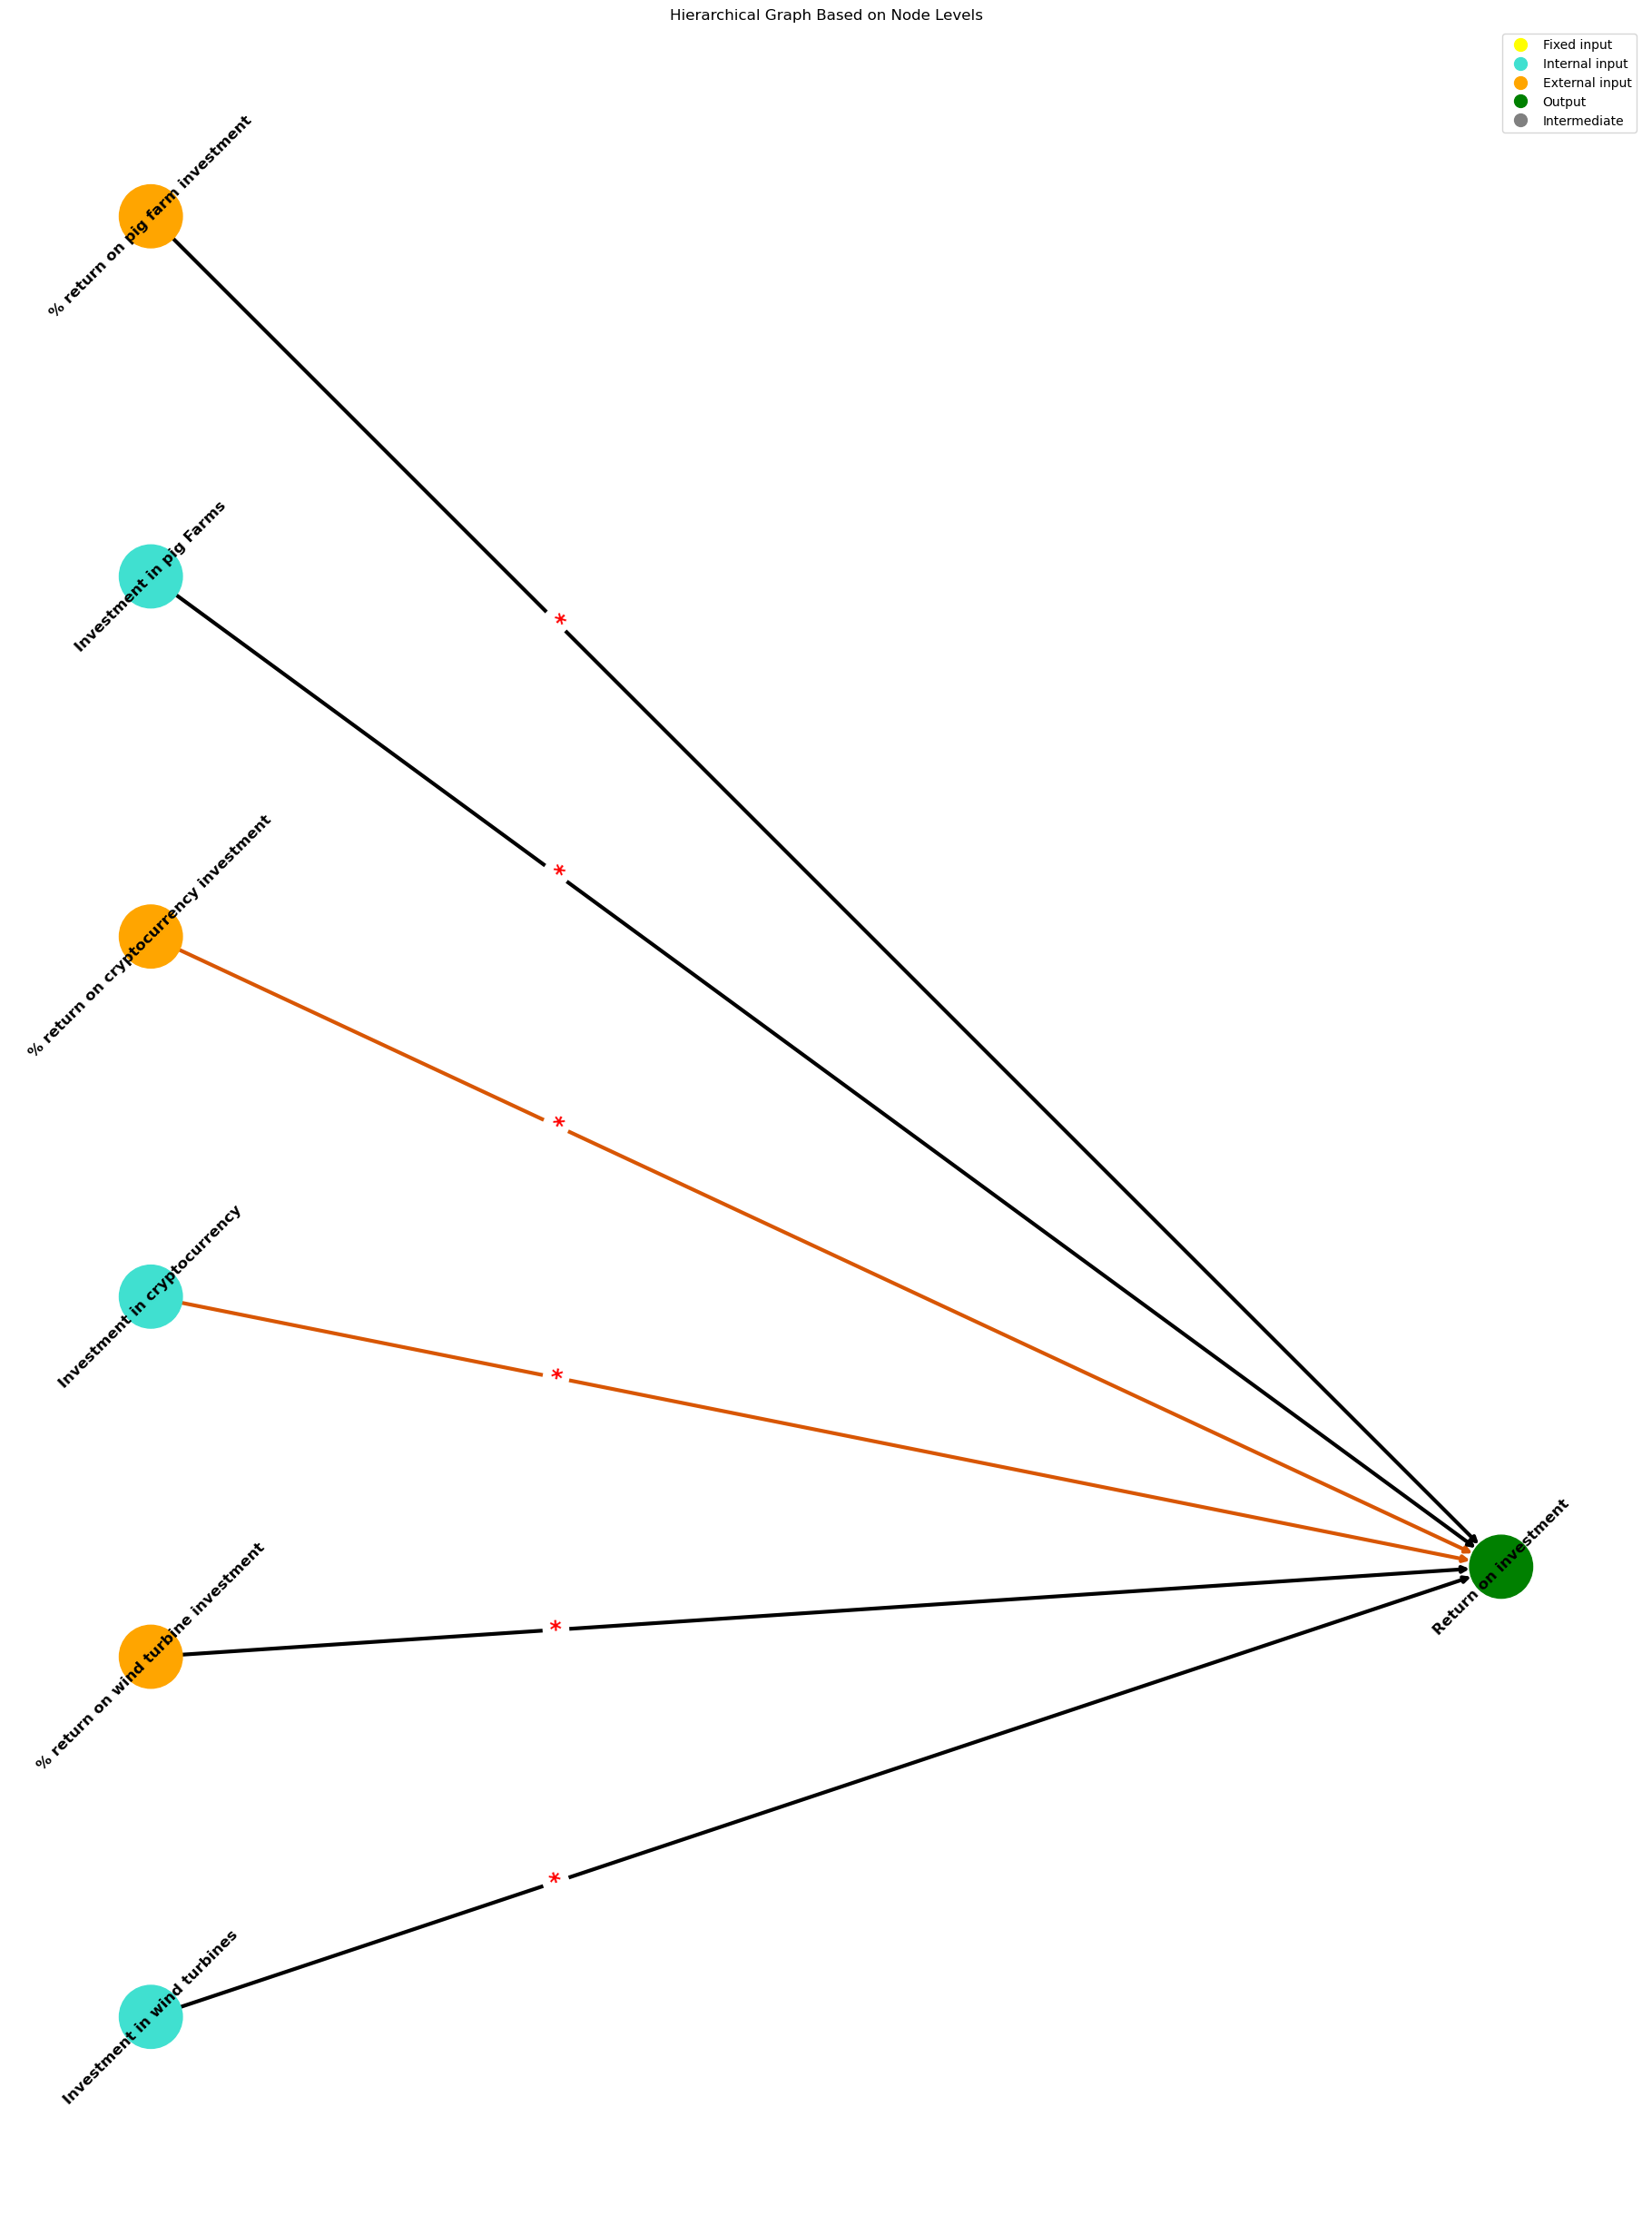

In [30]:
select_subset(G, 'Return on investment')

['% Decrease in biodiversity per degree Celsius increase', 'Less Wildlife (less bats)', 'Area per kg pig', 'Emission per cryptocurrency ', 'Amount of kilos pig', 'Diminishing number of bats per MW', '% Decrease in biodiversity per square feet ', 'Investment in clean drinking water', 'CO2 emission tmp 1', 'Number of wind turbines', 'Less Open Nature', 'Price of cryptocurrency', 'Number of MW', 'Number of kilos per pig', 'Investment in pig Farms', 'Emissions per liter of clean drinking water produced', 'MW per windturbine', 'Price per liter of produced drinking water', 'degree Celsius temperature increase tmp 2', 'degree Celsius temperature increase tmp 1', 'Price of wind turbine', 'Price per pig', 'Temperature change per MtCO2 emission', 'Liters of drinking water produced', 'Diminishing open nature per wind turbine', 'Investment in wind turbines', 'Number of pigs', 'Investment in cryptocurrency', '% Decrease in biodiversity per bat ', 'CO2 emission tmp 2', 'Number of cryptocurrencies', 

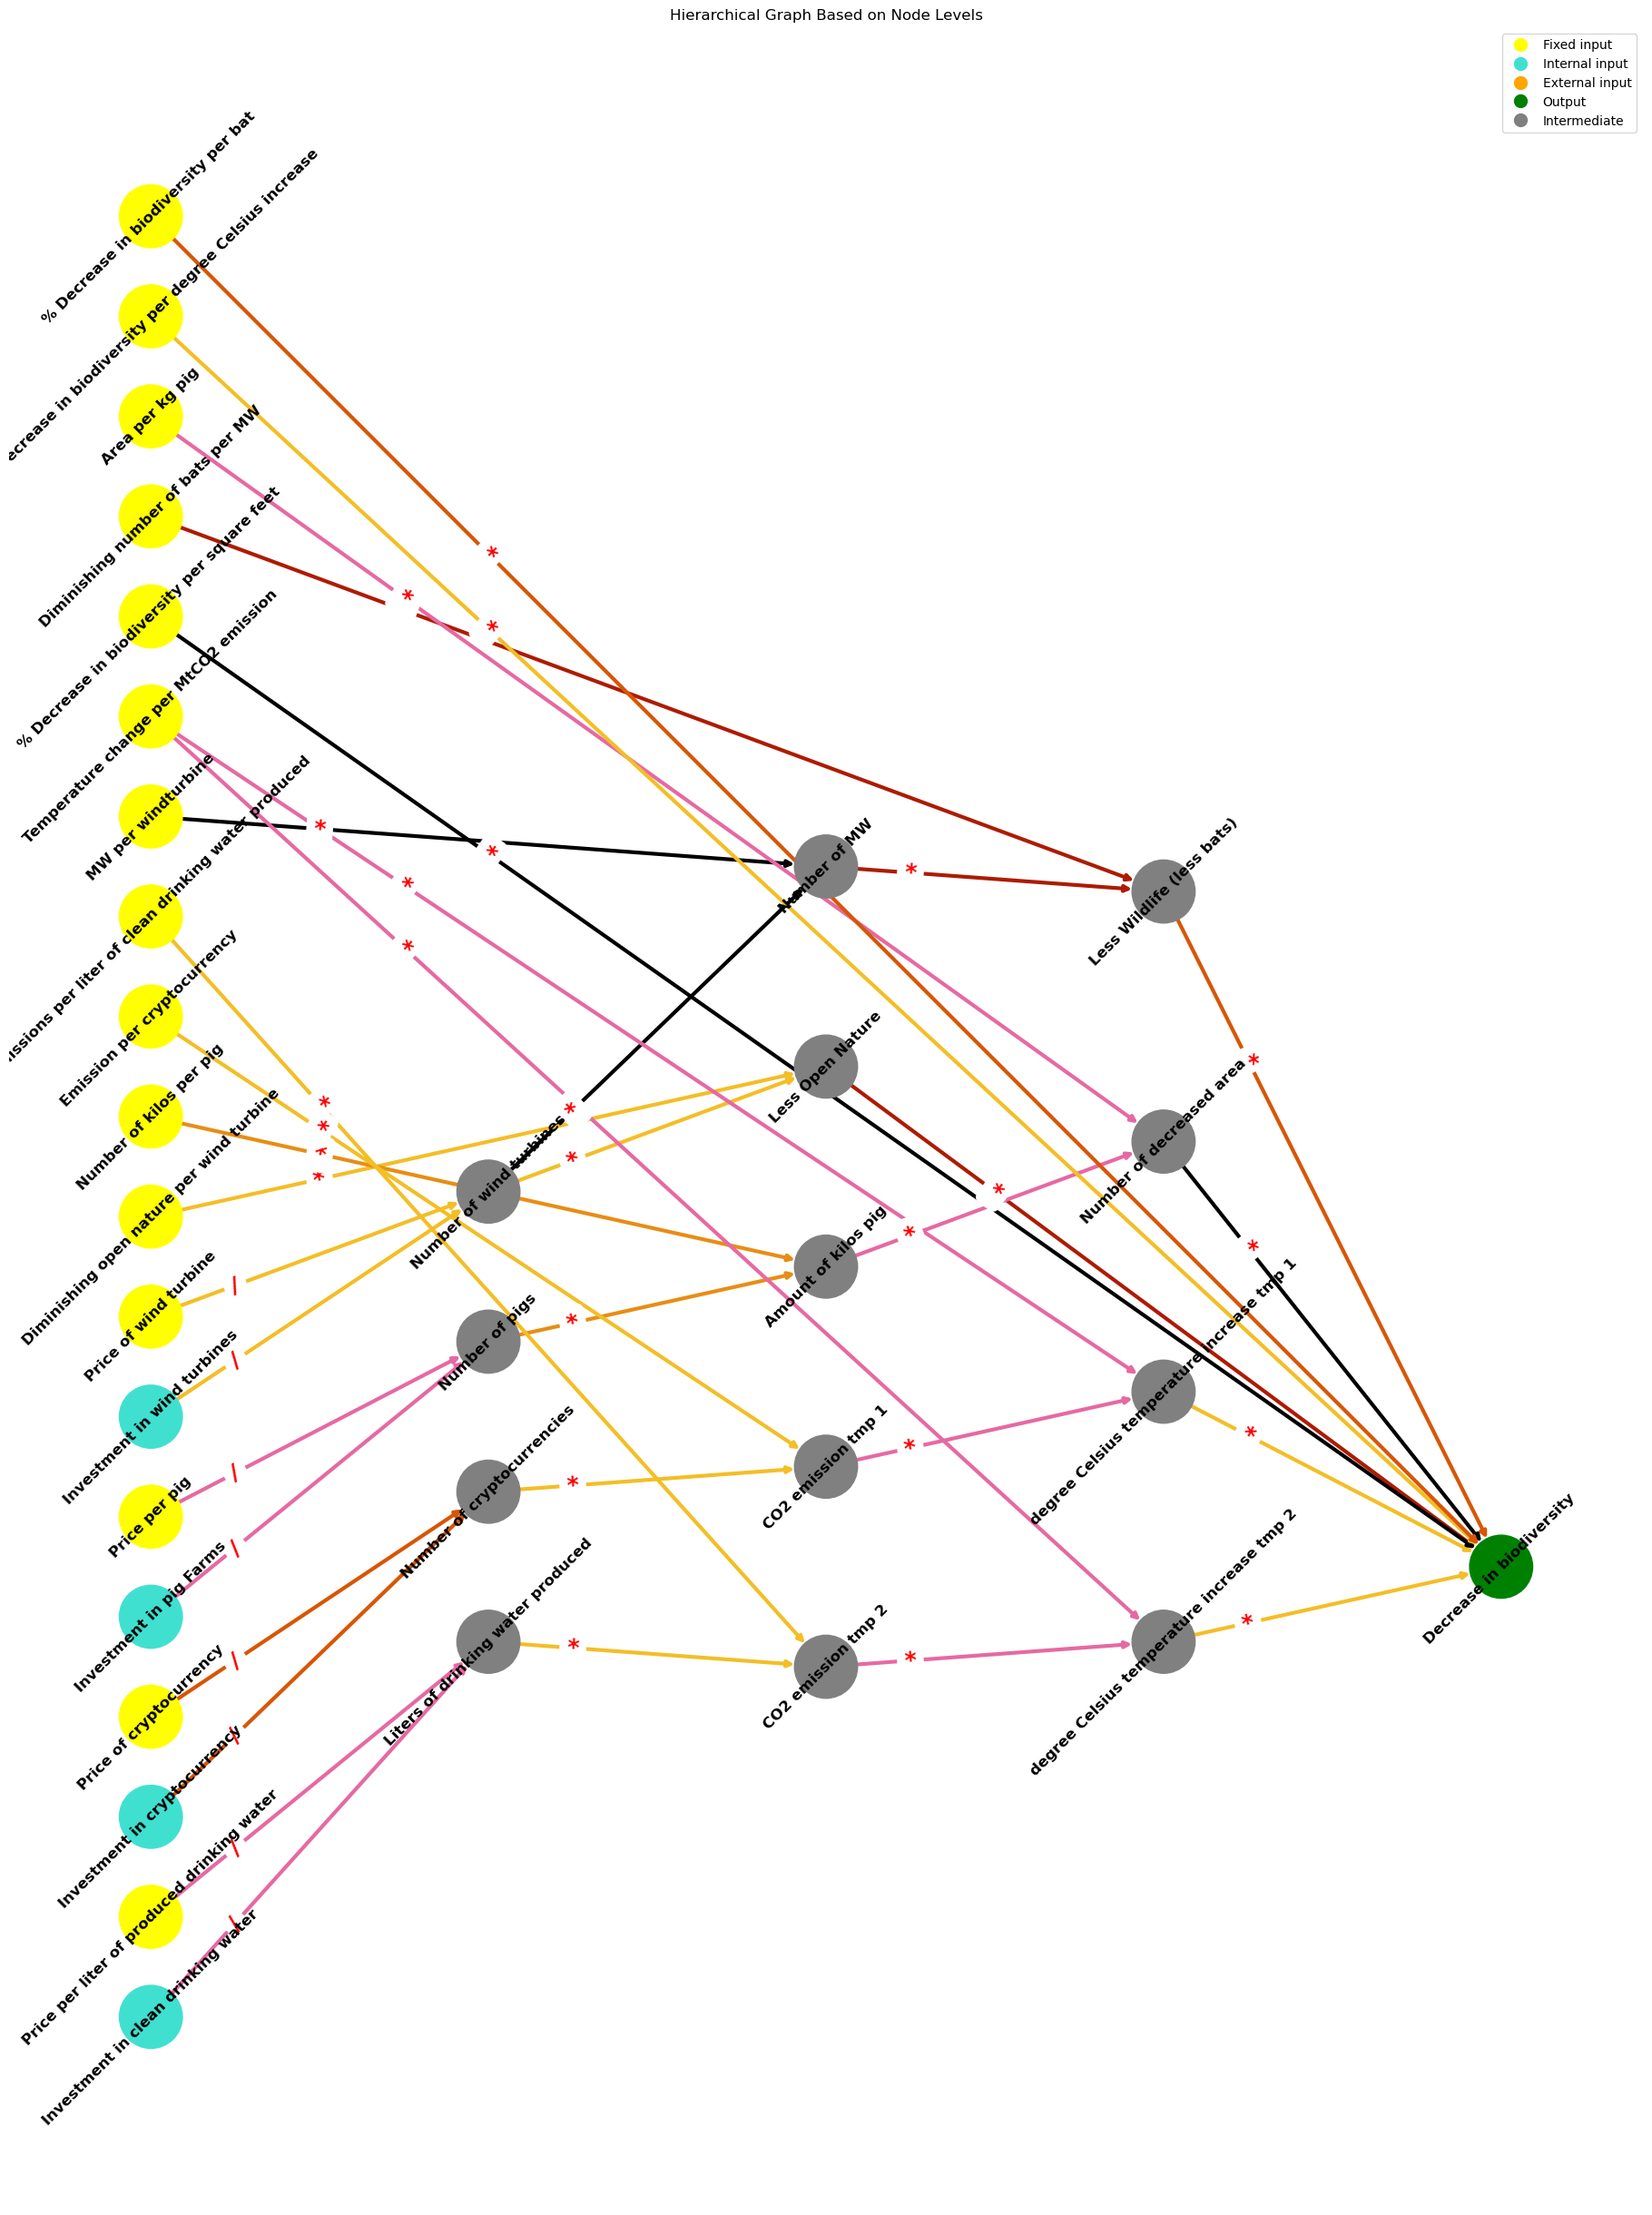

In [65]:
select_subset(G, 'Decrease in biodiversity')

### Next Steps
| TO DO                                                              | Status  |
| ------------------------------------------------------------------ | ------- |
| Making the code more robust                                        |         |
| Allowing for slight input mismatch (when specifying node name)     | DONE    |
| Spacing of the graph (E.g.: Sugiyama Layout)                       |         |
| Allowing for a 2 way input (Root node or leaf node)                |         |
| Make the text bolder and thicker edge lines, operator etc.         | DONE    |
| Adding different shapes for nodes in graph                         |         |
| Match legend with correct model object names                       |         |
| Integrating into the Visualize class                               |         |
| Testing with other cases                                           |         |
| PwC Colors for the edge lines                                      | DONE    |


Notes:
- Logic of the subset graph can be better
- Try out other layouts for spacing (e.g. Sugiyama)
- Try the Levenshtein distance algorithm for input mismatch issue

## Visualization frameworks

In [22]:
pip install dagviz

Note: you may need to restart the kernel to use updated packages.


In [23]:
from dagviz import Dagre
Dagre(G)

In [24]:
from dagviz import Metro
Metro(G)